# 虚拟水基本情况

In [1]:
#!/usr/bin/env python 3.83
# -*-coding:utf-8 -*-
# Created date: 2021-21-27
# @Author  : Shuang Song
# @Contact   : SongshGeo@gmail.com
# GitHub   : https://github.com/SongshGeo
# Research Gate: https://www.researchgate.net/profile/Song_Shuang9

# 常用的软件包
import sys, os  # 系统路径工具
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# 添加上级目录
sys.path.append('..')

# 显示绘图
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['axes.facecolor'] = 'white'

# 自定义配色
nature_colors = {
    'NS': "#c83c1c",
    'Nature': "#29303c",
    'NCC': "#0889a6",
    'NC': "#f1801f",
    'NG': "#006c43",
    'NHB': "#1951A0",
    'NEE': "#C7D530"
}

from tools.common_used import yellow_river_provinces

In [2]:
# 原始数据来源
source_path = r"../data/source/WF_crop_production_and_consumption_China_at_provincial_level/"

# 加载数据
test = pd.read_excel(r"{}/WF_crop_production_China_at_provincial_level_1961-2009.xlsx".format(source_path), header=1)

## 黄河流域的出口量占比？

In [3]:
total = pd.read_csv(r"../data/interim/total_nvwi_inner.csv")
total.head()

,Province Name,Province Code,Year,Wheat,Maize,Rice,Sorghum,Barley,Millet,Potato,...,Sugarbeet,Sugarcane,Cotton,Spinach,Tomato,Cabbage,Apple,Grape,Tea,Tobacco
0,Beijing,1,1979,74.210679,-202.548988,2167.611662,61.573556,25.898248,29.656194,60.822362,...,11.277791,31.530283,116.525242,-0.104435,5.044138,-0.115169,28.187313,-0.193126,36.908690,15.343575
1,Beijing,1,1980,348.485893,-469.240228,2008.891652,53.501047,32.405392,22.104911,45.497017,...,14.678364,29.944721,29.906058,-0.240176,4.356198,0.569861,29.046517,-0.241483,24.442461,11.350282
2,Beijing,1,1981,175.224922,-444.356016,2131.742579,59.675153,26.896964,17.714209,50.540135,...,15.156194,34.371399,129.736882,-0.482566,5.245837,0.518346,34.524341,-0.265388,27.687077,8.326199
3,Beijing,1,1982,289.229720,-561.901821,2040.696637,58.443023,24.713817,22.545120,58.807665,...,14.813250,42.501599,251.251187,-0.489691,5.228399,0.859771,35.401587,-0.332403,28.831569,19.395867
4,Beijing,1,1983,243.458895,-423.612109,2111.827123,48.704464,27.112838,28.133320,51.146220,...,18.288732,52.172649,376.820049,-0.385395,5.030235,0.818365,27.018137,-0.391425,29.650808,14.111434


In [4]:
result = pd.DataFrame()
for y in range(1978, 2009):
    tmp_data = total[total['Year'] == y].set_index('Province Name').iloc[:, 2:]
    result[y] = tmp_data[tmp_data > 0].sum(axis=1)

result = result/1000
result.head()

,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
Province Name,,,,,,,,,,,,,,,,,,,,,
Tianjin,2.298581,2.169281,2.404556,3.035851,3.026306,3.112495,2.757356,2.551063,2.579362,2.345453,...,2.433409,3.054226,3.382422,3.367501,3.446686,3.403249,3.220780,3.251403,3.277535,3.539011
Hebei,15.924828,15.634412,15.689255,16.088530,15.281187,16.408994,15.261020,15.793784,16.453011,15.758174,...,18.006363,18.213069,20.062636,19.186473,18.198669,17.747794,17.918785,17.563313,16.240018,14.773794
Shanxi,10.840263,9.515695,10.618057,9.864653,9.106630,9.905264,9.457703,9.854946,10.031189,9.378258,...,10.472343,11.355273,11.761234,10.693619,10.551924,11.474537,12.379736,11.875061,11.470579,10.803135
Neimeng,11.446644,10.509830,11.767232,11.269066,11.000655,12.019149,11.262873,10.143074,10.484781,9.219180,...,7.060240,7.449346,9.167463,8.199586,8.827173,8.554809,8.006145,8.337910,8.475117,8.575347
Liaoning,13.022967,12.092935,9.512000,11.057231,12.234824,11.441114,12.089130,13.422132,12.959667,10.761020,...,8.142850,9.114191,9.882964,9.146898,8.685983,8.720820,7.824841,8.532549,8.411237,8.117467


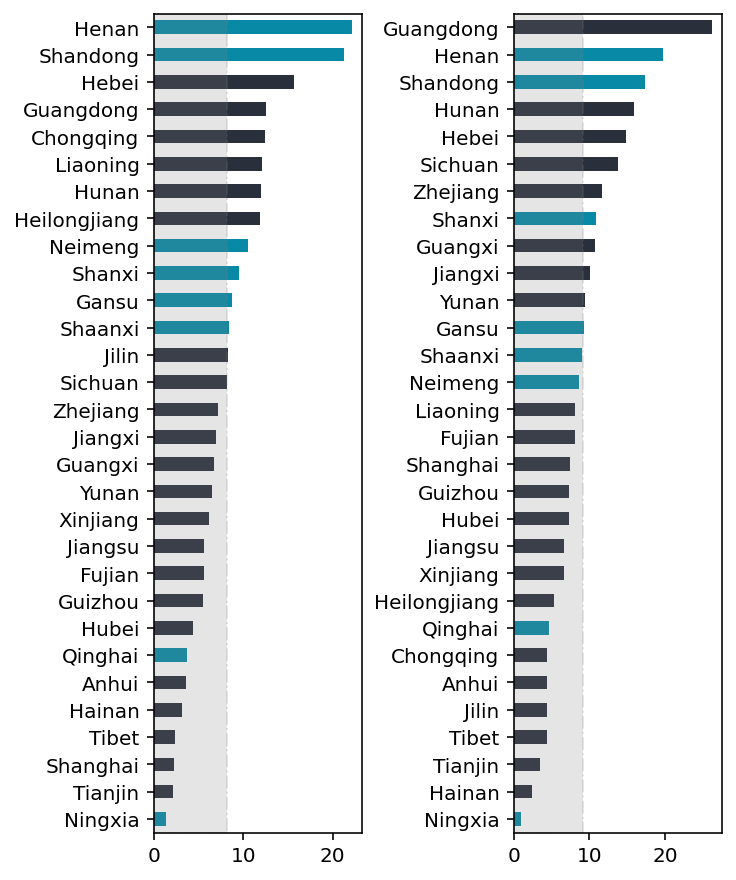

In [5]:
def plot_provinces(axs=None):
    if axs:
        ax1, ax2 = axs
    else:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 6), constrained_layout=True)
    color_yr = '#0889A6'
    color_others = '#29303C'
    result[1979].sort_values().plot.barh(ax=ax1, color=[color_yr if p in yellow_river_provinces else color_others for p in result[1979].sort_values().index])
    result[2008].sort_values().plot.barh(ax=ax2, color=[color_yr if p in yellow_river_provinces else color_others for p in result[2008].sort_values().index])
    avg_1979 = result[1979].mean()
    avg_2008 = result[2008].mean()

    for ax in (ax1, ax2):
        ax.set_ylim(ax2.get_ylim())
        ax.set_ylabel("")

    alpha = 0.2
    ax1.axvspan(0, avg_1979, color='gray', ls='-.', alpha=alpha)
    ax2.axvspan(0, avg_2008, color='gray', ls='-.', alpha=alpha)
    
plot_provinces()
plt.show();

In [6]:
# 对散点获得最佳的线性拟合
def get_optmize_fit_linear(x_arr, y_arr):
    from scipy import optimize
    def linear(x, k, b):
        return k * x + b
    
    k, b = optimize.curve_fit(linear, x_arr, y_arr)[0]  # 最小二乘拟合直线
    y_simu = linear(x_arr, k, b)  # 拟合直线的预测Y
    return y_simu

# 使用图片的比例来定位
def get_position_by_ratio(ax, x_ratio, y_ratio):
    """
    使用图片的比例来返回定位，从而更好的控制说明文字的位置
    ax: 一个 matplotlib 的画图轴对象
    x_ratio: 横坐标的比例位置
    y_ratio: 纵坐标的比例位置
    """
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()
    x = (x_max-x_min) * x_ratio + x_min
    y = (y_max-y_min) * y_ratio + y_min
    return x, y

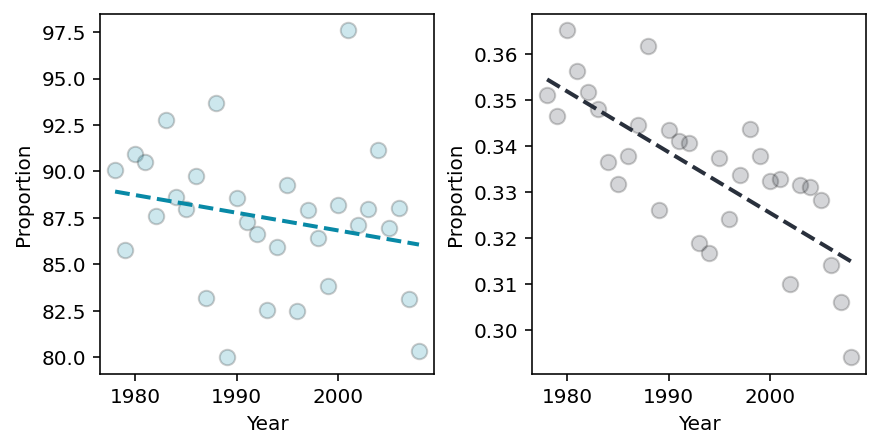

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3), constrained_layout=True)
yrs = np.arange(1978, 2009)
# 计算黄河流域输出虚拟水比例
yr_output = result.loc[yellow_river_provinces,:].sum().values
all_output = result.sum().values
yr_ratio = (yr_output / all_output)

alpha=0.2

ax1.scatter(yrs, yr_output, color='#0889A6', s=60, alpha=alpha, edgecolors='black')
ax1.plot(yrs, get_optmize_fit_linear(yrs, yr_output), color='#0889A6', lw=2, ls='--', label='VWF')
ax1.set_ylabel("Virtual water flow")

ax2.scatter(yrs, yr_ratio, color='#29303C', s=60, alpha=alpha, edgecolors='black')
ax2.plot(yrs, get_optmize_fit_linear(yrs, yr_ratio), color='#29303C', lw=2, ls='--', label="Proportion")
ax2.set_ylabel("Proportion")
ax2.set_xlabel("Year")

ax1.set_xlabel("Year")
ax1.set_ylabel("Proportion")

plt.savefig("../figs/proportion.jpg", dpi=300)
plt.show();

## Footprint

<AxesSubplot:>

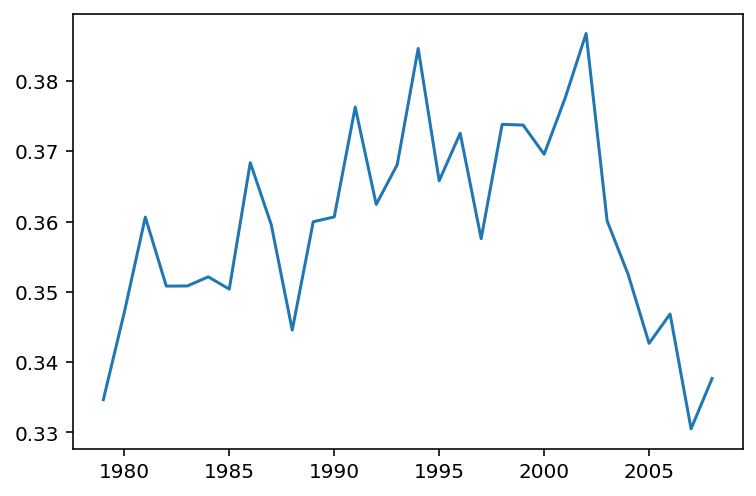

In [8]:
footprint = pd.read_csv(r"../data/interim/WF_Total.csv")

footprint_result = pd.DataFrame()
for y in range(1979, 2009):
    tmp_data = footprint[footprint['Year'] == y].set_index('Province Name').iloc[:, 2:]
    footprint_result[y] = tmp_data.sum(axis=1)
    
yr_footprint = footprint_result.T[yellow_river_provinces].sum(axis=1)
all_footprint = footprint_result.sum()

(yr_footprint / all_footprint).plot()

## 最终作图

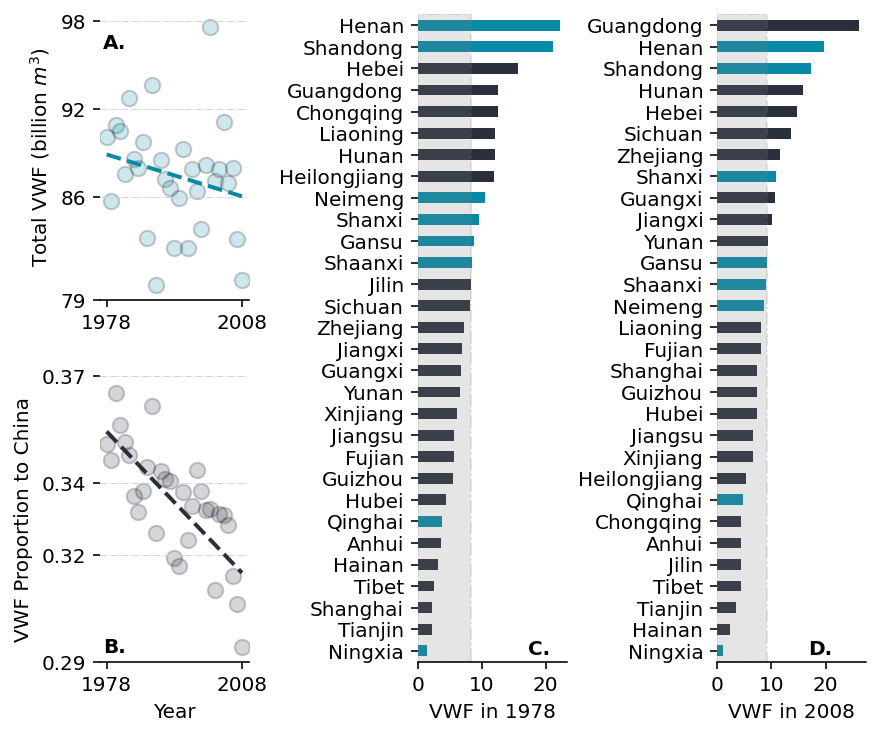

In [9]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as ticker

fig = plt.figure(constrained_layout=True, figsize=(6, 5))

gs = GridSpec(2, 3, figure=fig)
# 可选参数：height_ratios=[2,3,5], hspace=0, wspace=0

ax1 = fig.add_subplot(gs[:, 1])
ax2 = fig.add_subplot(gs[:, 2])
ax3 = fig.add_subplot(gs[0, 0])
ax4 = fig.add_subplot(gs[1, 0])

# fig.suptitle("GridSpec")
ax3.scatter(yrs, yr_output, color='#0889A6', s=60, alpha=alpha, edgecolors='black')
ax3.plot(yrs, get_optmize_fit_linear(yrs, yr_output), color='#0889A6', lw=2, ls='--', label='VWF')
ax3.set_ylabel("Total VWF (billion $m^3$)")

ax4.scatter(yrs, yr_ratio, color='#29303C', s=60, alpha=alpha, edgecolors='black')
ax4.plot(yrs, get_optmize_fit_linear(yrs, yr_ratio), color='#29303C', lw=2, ls='--', label="Proportion")
ax4.set_ylabel("VWF Proportion to China")
ax4.set_xlabel("Year")

for ax in [ax1, ax2, ax3, ax4]:
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)

for ax in [ax3, ax4]:
    ax.set_xticks(np.array([1978, 2008]))
    ax.yaxis.grid(color='lightgray', linestyle='-.', linewidth=0.5)
ax3.set_yticks(np.round(np.linspace(*ax3.get_ylim(), 4), 0))
ax4.set_yticks(np.round(np.linspace(*ax4.get_ylim(), 4), 2))
    
for ax in [ax1, ax2]:
    ax.set_xticks(np.array([0, 10, 20]))
    ax.set_ylabel("")
    
ax1.set_xlabel("VWF in 1978")
ax2.set_xlabel("VWF in 2008")

ax3.text(*get_position_by_ratio(ax3, 0.1, 0.90), "A.", weight="bold", va='center', ha='center')
ax4.text(*get_position_by_ratio(ax4, 0.1, 0.05), "B.", weight="bold", va='center', ha='center')
ax1.text(*get_position_by_ratio(ax1, 0.95, 0.1), "C.", weight="bold", va='center', ha='center')
ax2.text(*get_position_by_ratio(ax2, 0.95, 0.1), "D.", weight="bold", va='center', ha='center')

plot_provinces([ax1, ax2])
plt.savefig("../figs/VWF_volume.jpg", dpi=300)
plt.show();